# Evolución de una partícula en el aire sujeta a gravedad y resistencia viscosa

Las ecuaciones diferenciales ordinarias (EDO) describen la evolución de un sistema sujeto a dinámicas internas y externas. Específicamente, un EDO vincula una cantidad que depende de una sola variable independiente (tiempo, por ejemplo) a sus derivados. Además, el sistema puede estar bajo la influencia de factores externos. Un ODE de primer orden generalmente se puede escribir como:

\begin{align}
y'(t) & = f(t,y(t))
\end{align}

Generalmente, una EDO de orden $n$ implica derivadas sucesivas de $y$ hasta el orden $n$. Se dice que la EDO es lineal o no lineal dependiendo de si $f$ es lineal en $y$ o no.

Las EDO aparecen naturalmente cuando el ritmo de cambio de una cantidad depende de su valor. Por lo tanto, las EDO se encuentran en muchas disciplinas científicas como la mecánica (evolución de un cuerpo sujeto a fuerzas dinámicas), química (concentración de productos que reaccionan), biología (propagación de una epidemia), ecología (crecimiento de una población), economía y finanzas, entre otros.

Mientras que las EDO simples pueden resolverse analíticamente, muchas EDO requieren un tratamiento numérico. A continuación simularemos una EDO autónoma lineal de segundo orden simple, describiendo la evolución de una partícula en el aire sujeta a la gravedad y resistencia viscosa. Aunque esta ecuación podría resolverse analíticamente, aquí usaremos SciPy para simularla numéricamente.

## Como lo hacemos

1. Se importa Numpy, SciPy y matplotlib:

In [102]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
%matplotlib inline

2. Se definen parametros utilizados en el moelo

In [103]:
m = 1.  # masa de la partícula
k = 1.  # coeficiente de arrastre
g = 9.81  # aceleración por gravedad

3. Tenemos dos variables: $x$ y $y$ (dos dimensiones). Notamos que $u = (x, y)$. La ODE que vamos a simular es:

\begin{align}
u'' = \frac{k}{m}u'+g
\end{align}

Aquí, $g$ es el vector de aceleración por gravedad.

Para simular esta EDO de segundo orden con SciPy, podemos convertirlo en una EDO de primer orden (otra opción sería resolver $u'$ primero antes de integrar la solución). Para hacer esto, consideramos dos variables 2D: $u$ y $u'$. Notamos $v = (u,u′)$. Podemos expresar $v'$ en función de $v$. Ahora, creamos el vector inicial $v_0$ en el tiempo $t = 0$: tiene cuatro componentes.


In [104]:
# La posición inicial es (0, 0).
v0 = np.zeros(4)
# El vector de velocidad inicial está orientado 
# a la esquina superior derecha.
v0[2] = 4.
v0[3] = 10.

4. Creemos una función de Python $f$ que tome el vector actual $v(t_0)$ y un tiempo $t_0$ como argumentos (con parámetros opcionales) y que devuelva la derivada $v'(t_0)$:

In [105]:
def f(v, t0, k):
    # v tiene cuatro componentes: v=[u, u'].
    u, udot = v[:2], v[2:]
    # Calculamos la segunda derivada u'' de u.
    udotdot = -k / m * udot
    udotdot[1] -= g
    # Devolvemos v'=[u', u''].
    return np.r_[udot, udotdot]

def wrapper(v, t0):
    

5. Ahora, simulamos el sistema para diferentes valores de $k$. Utilizamos la función SciPy `odeint()`, definida en el paquete `scipy.integrate`.

(0, 6)

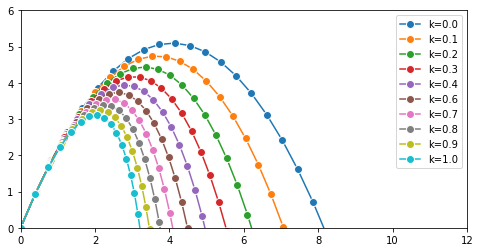

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Queremos evaluar el sistema en 30 tiempos 
# linealmente espaciados entre t=0 y t=3.
t = np.linspace(0., 3., 30)

# Simulamos el sistema para diferentes valores de k.
for k in np.linspace(0., 1., 10):
    # Simulamos el sistema y evaluamos v en los tiempos dados.
    v = spi.odeint(f, v0, t, args=(k,))
    # Trazamos la trayectoria de la partícula.
    ax.plot(v[:, 0], v[:, 1], 'o-', mew=1, ms=8,
            mec='w', label=f'k={k:.1f}')
ax.legend()
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)

En la figura anterior, la trayectoria más externa (azul) corresponde al movimiento sin arrastre (sin resistencia al aire). Es una parábola. En las otras trayectorias, podemos observar el efecto creciente de la resistencia del aire, parametrizada con $k$.

## Cómo funciona

Expliquemos cómo obtuvimos la ecuación diferencial de nuestro modelo. Sea $u = (x, y)$ 
codifique la posición 2D de nuestra partícula con la masa $m$. Esta partícula está sujeta 
a dos fuerzas: gravedad $mg = (0, −9.81⋅m)$ y resistencia al aire $F = −ku′$. Este último 
término depende de la velocidad de la partícula y solo es válido a baja velocidad. Con 
velocidades más altas, necesitamos usar expresiones no lineales más complejas.

Ahora, usamos la segunda ley del movimiento de Newton en la mecánica clásica. Esta ley establece que, en un marco de referencia inercial, la masa multiplicada por la aceleración de la partícula es igual a la suma de todas las fuerzas aplicadas a esa partícula. Aquí obtenemos:

\begin{align}
m⋅u′′=F+mg
\end{align}

Inmediatamente obtenemos nuestra EDO de segundo orden:

\begin{align}
u′′=−\frac{k}{m}u′+g
\end{align}

Lo transformamos en un sistema de EDO de orden único, con $v = (u, u′)$:

\begin{align}
v′=(u′,u′′)=(u′,−\frac{k}{m}u′+g)
\end{align}

El último término puede expresarse solamente como una función de $v$.

La función SciPy `odeint()` es un solucionador de caja negra; simplemente especificamos la función que describe el sistema, y SciPy lo resuelve automáticamente. Esta función aprovecha la biblioteca FORTRAN ODEPACK, que contiene código bien probado que ha sido utilizado durante décadas por muchos científicos e ingenieros.

Un ejemplo de un solucionador numérico simple es el método de Euler. Para resolver numéricamente la ODE autónoma $y′ = f (y)$, el método consiste en discretizar el tiempo con un paso de tiempo $dt$ y reemplazar $y'$ con una aproximación de primer orden:

\begin{align}
y′(t)≃\frac{y(t+dt)−y(t)}{dt}
\end{align}

Luego, a partir de una condición inicial $y_0 = y(t_0)$, el método evalúa a $y$ sucesivamente con la siguiente relación de recurrencia:

\begin{align}
y_{n+1} = y_n + dt⋅f(y_n) \quad \text{with} \quad t=n⋅dt, \quad\ y_n=y(n⋅dt)
\end{align}



# Obtenido de

https://ipython-books.github.io/123-simulating-an-ordinary-differential-equation-with-scipy/